# Predictive Modeling - House Price Prediction
Develop a predictive model to estimate house prices based on various features. By 
analyzing historical data, the model aims to provide accurate price predictions and identify 
key factors influencing house prices.

Import Libraries

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings

# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Enable inline plotting
%matplotlib inline


# Load the dataset and perform a quick inspection
#### We will check the shape, column information, unique values, and summary statistics to get an initial overview of the data.


In [20]:
# Load dataset
HouseDF = pd.read_csv('USA_Housing.csv')

# Check dataset shape
print("Dataset Shape:", HouseDF.shape)




Dataset Shape: (5000, 7)


In [21]:
# Display dataset info
HouseDF.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [22]:
# Display columns, unique values per column, and basic statistical summary
print("\nColumn Names:", HouseDF.columns)



Column Names: Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [23]:
print("\nUnique Values per Column:\n", HouseDF.nunique())



Unique Values per Column:
 Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64


In [24]:
print("\nDataset Summary:\n", HouseDF.describe())


Dataset Summary:
        Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.

### Preview the first few rows of the dataset to get a better sense of the data


In [25]:
# Display the first 5 rows
HouseDF.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Use pairplot to visualize relationships between different features in the dataset
### This is helpful in identifying patterns and correlations visually between features.


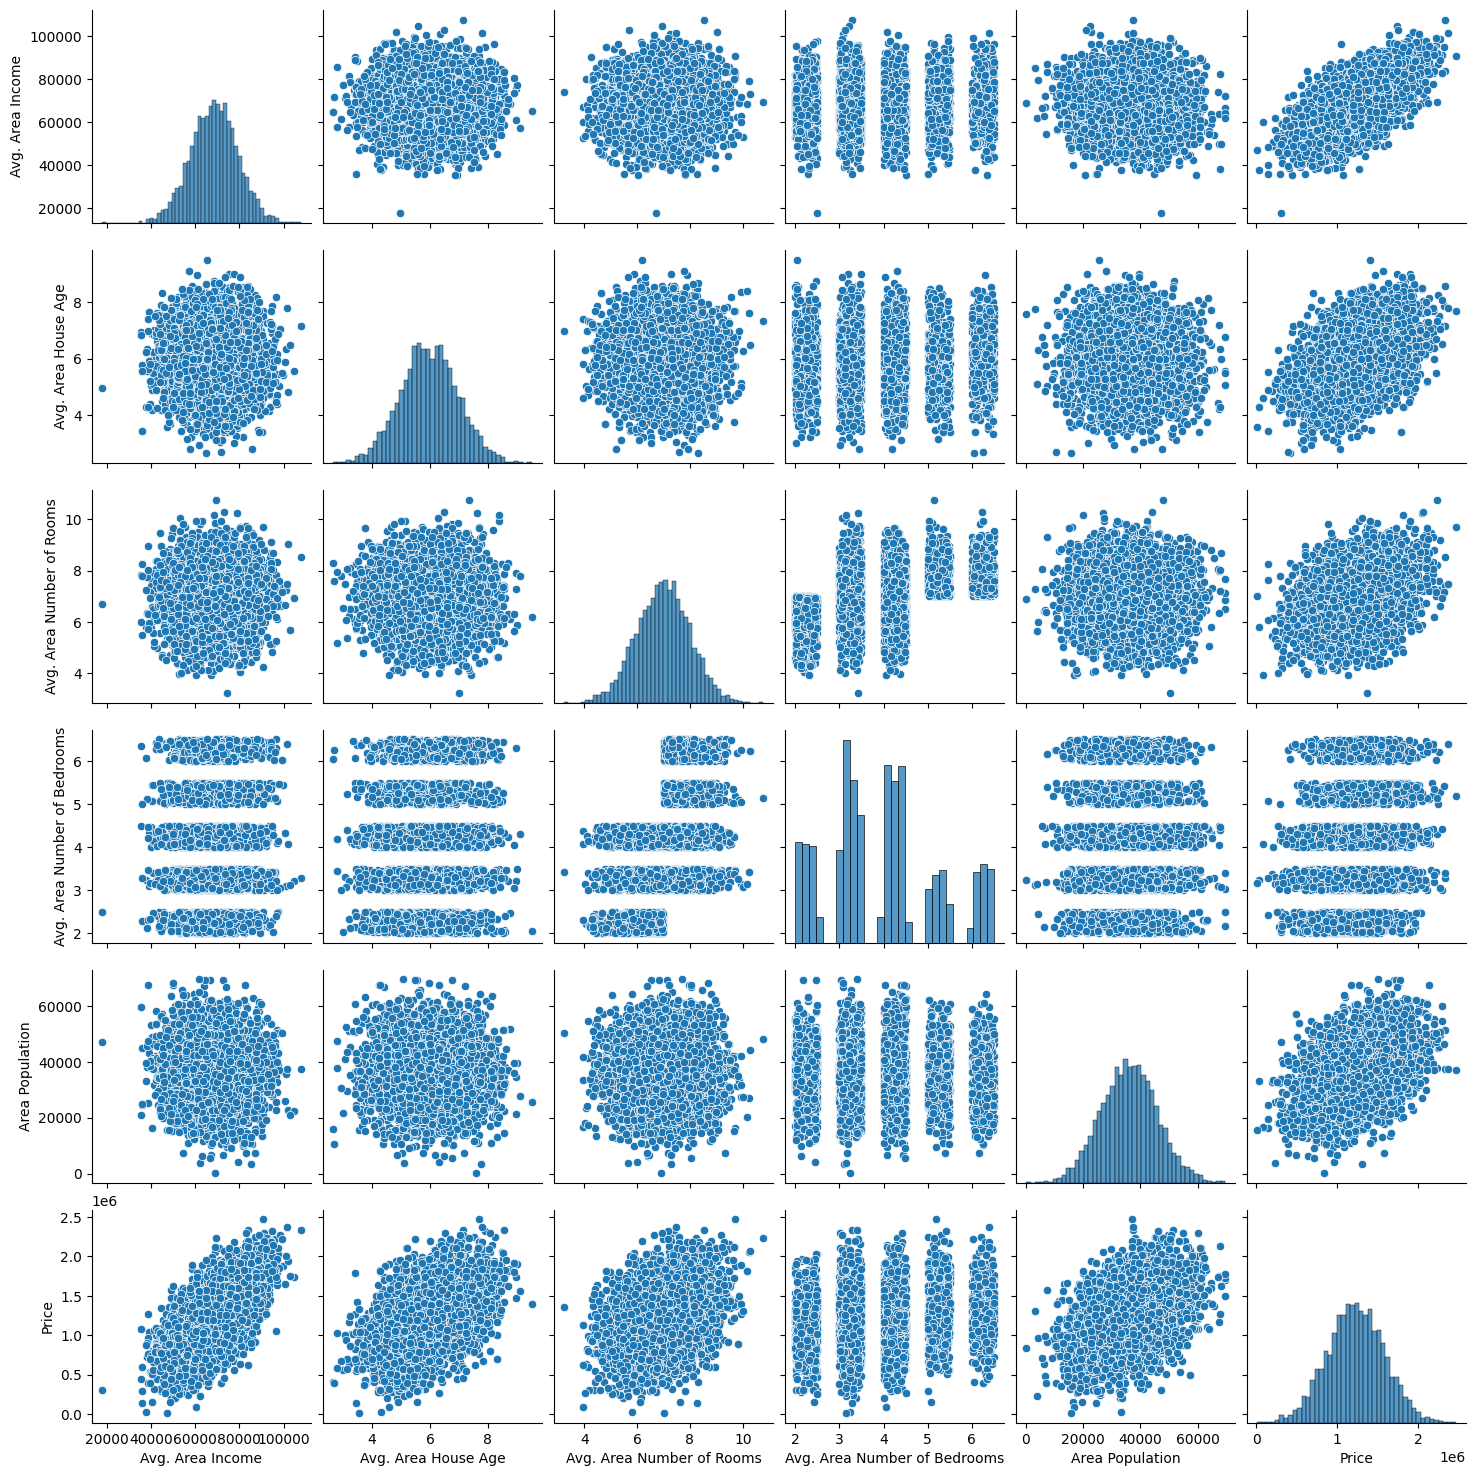

In [26]:
# Pairplot for all columns in the dataset
sns.pairplot(HouseDF)
plt.show()


### Plot the distribution of the target variable 'Price' to understand its spread and skewness.


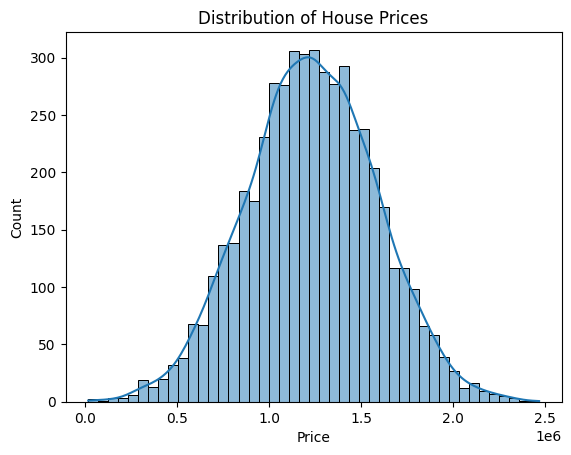

In [27]:
# Plot distribution of 'Price'
sns.histplot(HouseDF['Price'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.show()


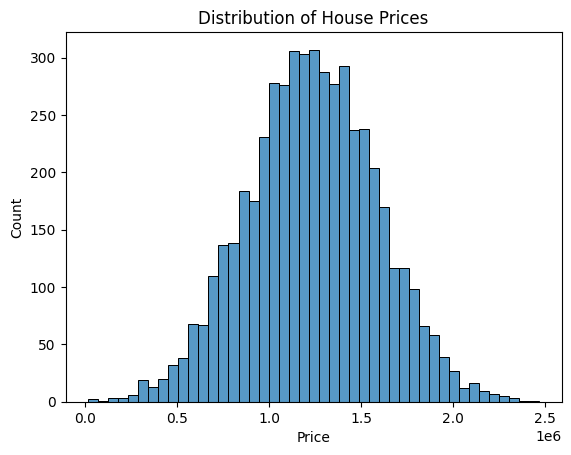

In [28]:
# Plot distribution of 'Price'
sns.histplot(HouseDF['Price'], kde=False)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.show()


### Box plots for each feature against the 'Price' to identify any outliers that may exist in the data.
### This can help us spot unusual or extreme values.


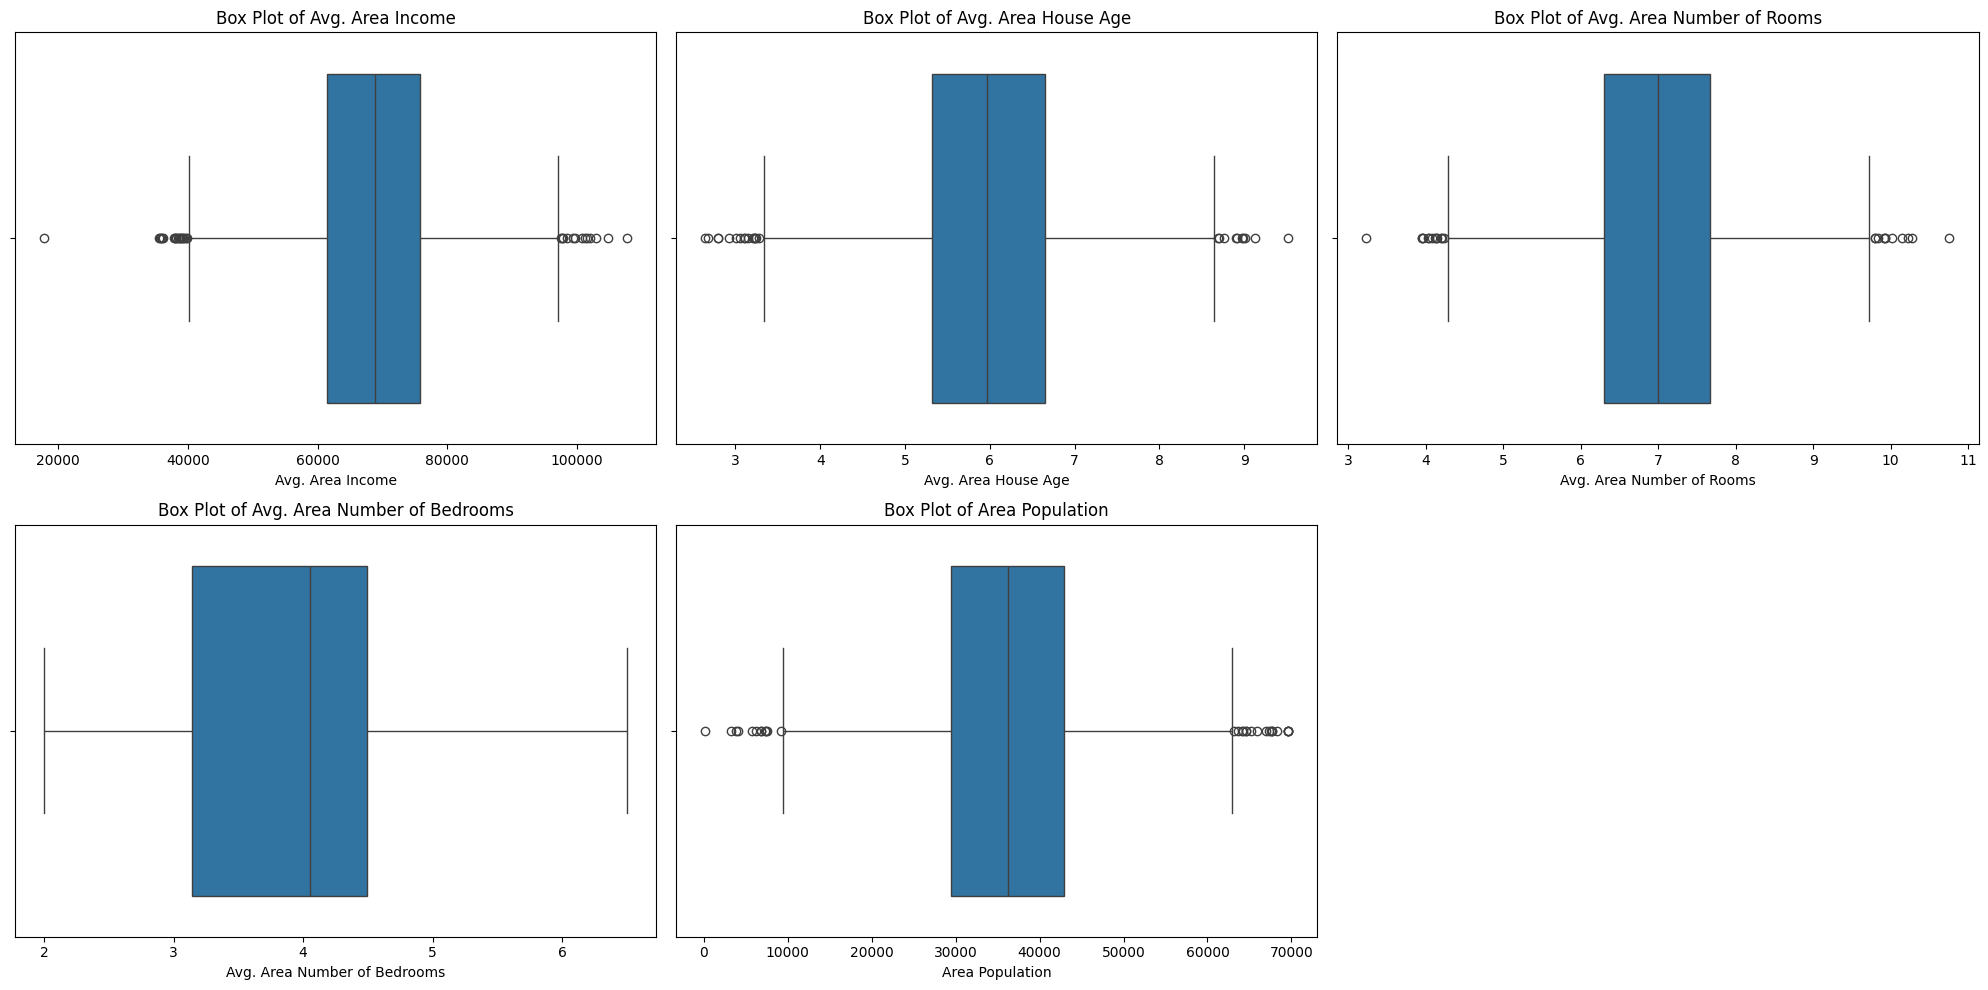

In [29]:
# Box plots for key features vs. 'Price'
plt.figure(figsize=(20, 10))

# List of features to create box plots for
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=HouseDF[feature])
    plt.title(f"Box Plot of {feature}")

plt.tight_layout()
plt.show()


### Create a heatmap to visualize correlations between numeric variables.
### This will help identify multicollinearity and significant correlations with the target variable.


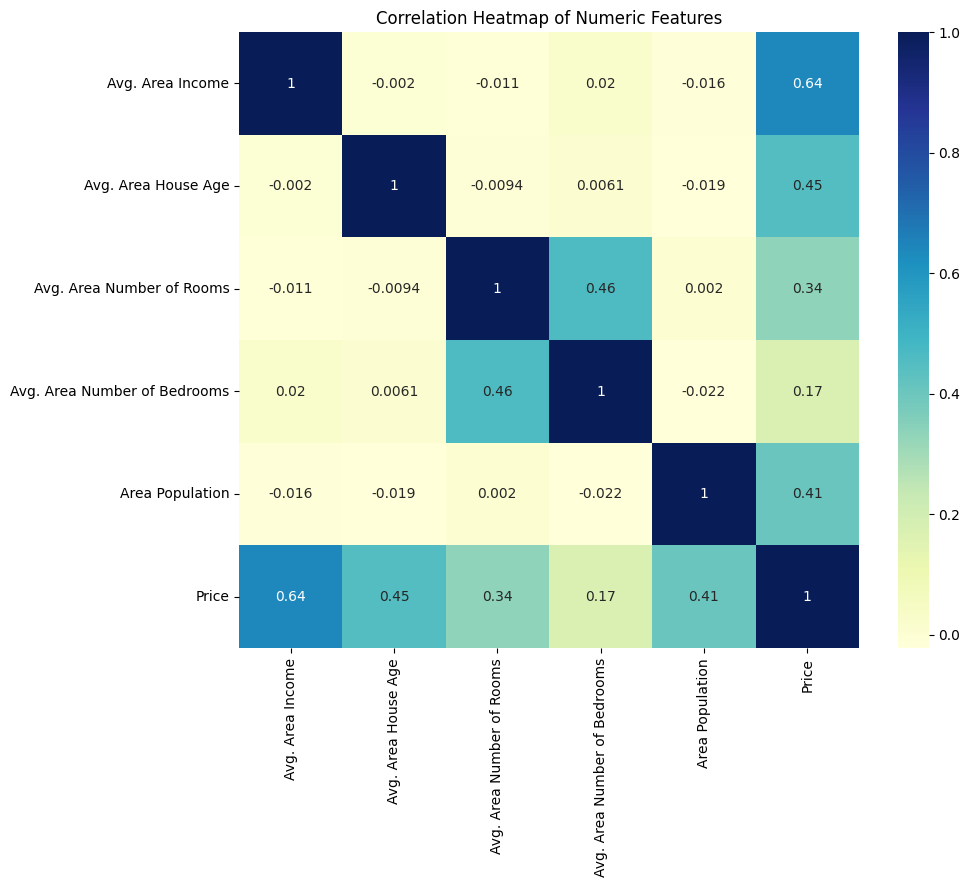

In [30]:
# Select only the numeric columns and create a correlation heatmap
numeric_df = HouseDF.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


### Create scatter plots to visualize relationships between each feature and 'Price'.
### This can reveal linear trends or other patterns that are useful for regression analysis.


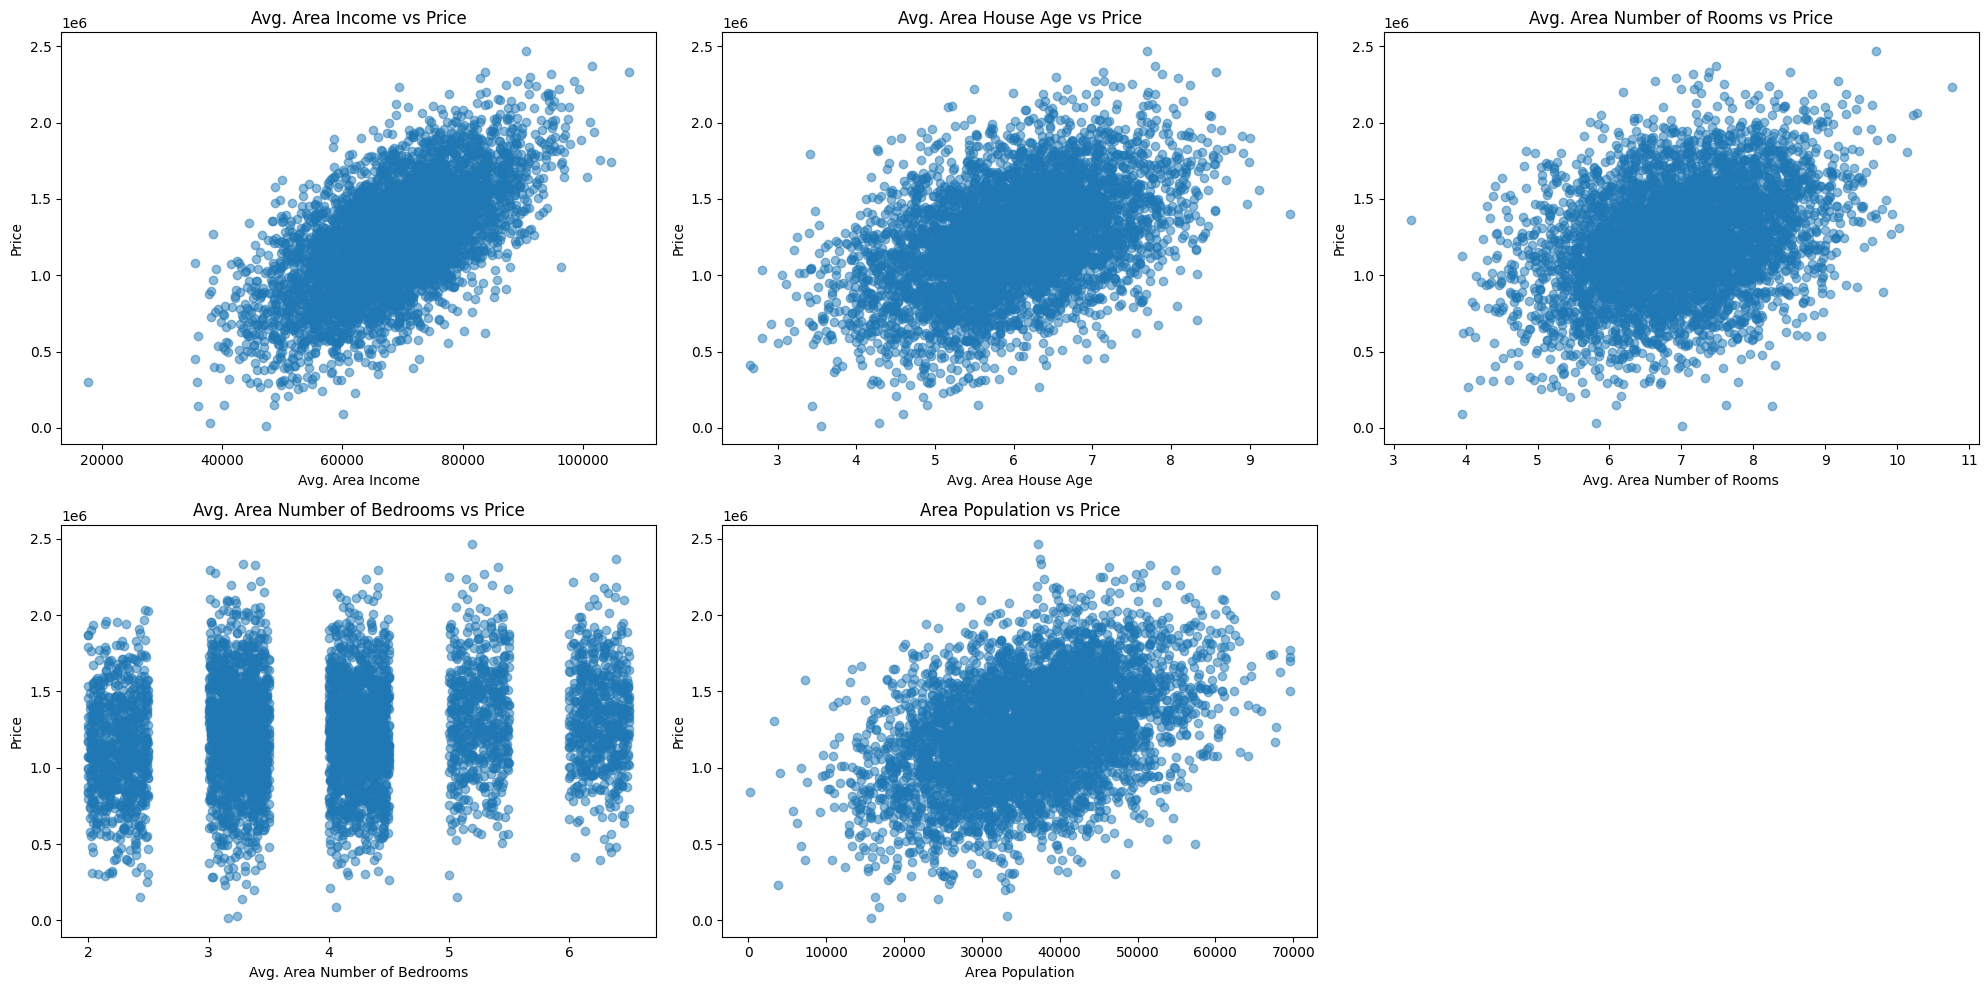

In [31]:
# Scatter plots for key features vs. 'Price'
plt.figure(figsize=(20, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(HouseDF[feature], HouseDF['Price'], alpha=0.5)
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()


### Split the data into training and testing sets.
### Train a Linear Regression model on the training data.


In [32]:
# Define features and target variable
X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = HouseDF['Price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Train the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Display intercept and coefficients
print("Intercept:", lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df


Intercept: -2640159.7968526953


,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


##### Use the trained model to predict on the test set.
#### Visualize the predictions vs. actual values and compute evaluation metrics (MAE, MSE, RMSE).


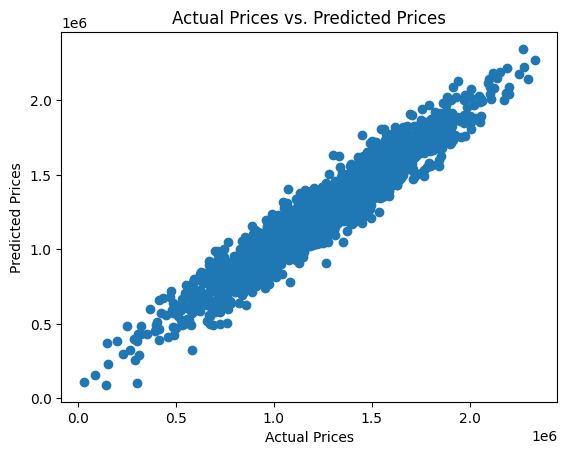

In [33]:
# Predictions
predictions = lm.predict(X_test)

# Scatter plot for predictions vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()





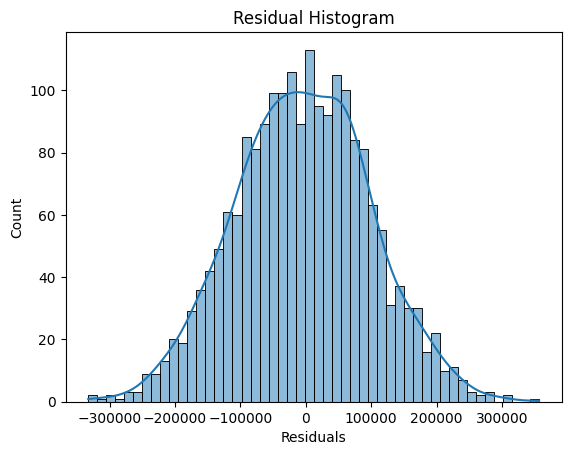

In [34]:
# Residual histogram to visualize the errors
sns.histplot((y_test - predictions), bins=50, kde=True)
plt.title("Residual Histogram")
plt.xlabel("Residuals")
plt.show()

### A residual plot to visualize errors in predictions.
### This plot shows if the errors are randomly distributed, which is ideal for linear regression.
### Residual plot of true values vs. residuals

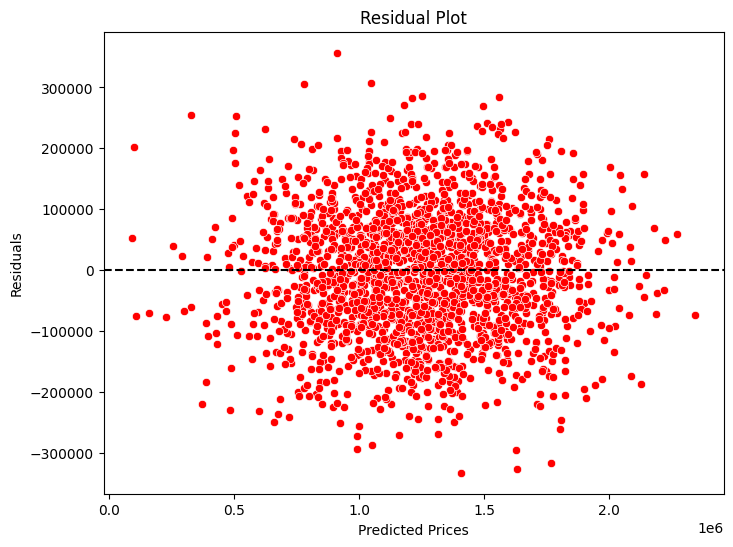

In [35]:

residuals = y_test - predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=residuals, color="red")
plt.axhline(0, color='black', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()


In [36]:
# Calculate and display error metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error (MAE): 82288.22251914942
Mean Squared Error (MSE): 10460958907.20898
Root Mean Squared Error (RMSE): 102278.82922290899


# LearnWise Together

<div align="left">
  <img src="./logo.png" alt="LearnWise Together Logo" width="200" />
</div>


---

## Connect with Us on Social Media

[![Facebook](https://img.shields.io/badge/Facebook-%231877F2.svg?style=for-the-badge&logo=facebook&logoColor=white)](https://www.facebook.com/YOUR_PAGE)
[![Instagram](https://img.shields.io/badge/Instagram-%23E4405F.svg?style=for-the-badge&logo=instagram&logoColor=white)](https://www.instagram.com/YOUR_PAGE)
[![Twitter](https://img.shields.io/badge/Twitter-%231DA1F2.svg?style=for-the-badge&logo=twitter&logoColor=white)](https://twitter.com/YOUR_PAGE)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-%230077B5.svg?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/YOUR_PROFILE)

---

### Join our community and stay updated on the latest courses, internships, and projects at LearnWise Together!
